In [42]:
import pandas as pd #data processing
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
import os

In [43]:
df = pd.read_csv("./Resources/diamonds.csv")

In [44]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [45]:
df.columns
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Data Cleaning

In [46]:

df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [47]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.drop(columns=['Unnamed: 0'], inplace=True)

## Data Quality check

In [49]:
corr = df.corr()

In [50]:
corr.style.background_gradient(cmap='coolwarm')

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


In [54]:
df.price = np.log10(df.price)

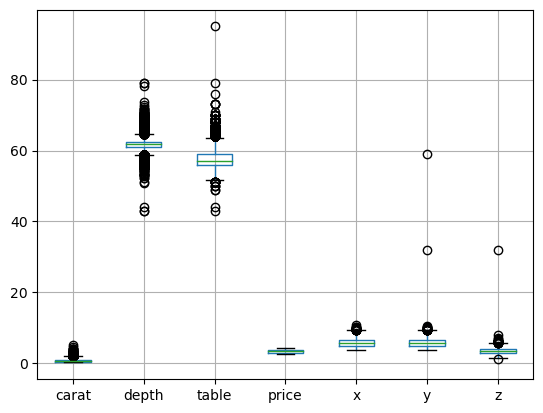

In [55]:
# times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
# fig1, ax1 = plt.subplots()
# ax1.set_title('Reaction Times at Baseball Batting Cage')
# ax1.set_ylabel('Reaction Time (ms)')
# ax1.boxplot(times)
# plt.show()
df.boxplot()
plt.show()

In [57]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3.381587,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,0.440609,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,2.513218,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,2.977266,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,3.380392,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,3.726177,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,4.274689,10.740000,58.900000,31.800000


In [60]:
for col in df.columns:
    if col in ('cut', 'color', 'clarity'):
        continue
    df[col] = df[col] / df[col].max()

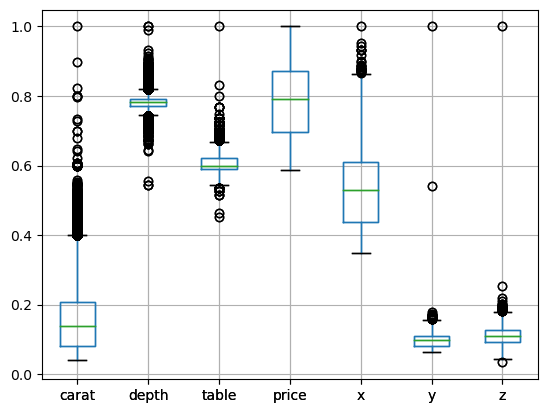

In [62]:
df.boxplot()
plt.show()

In [ ]:
# split data into train/test
from sklearn. import te

In [65]:
df.info

<bound method DataFrame.info of           carat        cut color clarity     depth     table     price  \
0      0.045908      Ideal     E     SI2  0.778481  0.578947  0.587930   
1      0.041916    Premium     E     SI1  0.756962  0.642105  0.587930   
2      0.045908       Good     E     VS1  0.720253  0.684211  0.588241   
3      0.057884    Premium     I     VS2  0.789873  0.610526  0.590393   
4      0.061876       Good     J     SI2  0.801266  0.610526  0.590697   
...         ...        ...   ...     ...       ...       ...       ...   
53935  0.143713      Ideal     D     SI1  0.769620  0.600000  0.804839   
53936  0.143713       Good     D     SI1  0.798734  0.578947  0.804839   
53937  0.139721  Very Good     D     SI1  0.794937  0.631579  0.804839   
53938  0.171657    Premium     H     SI2  0.772152  0.610526  0.804839   
53939  0.149701      Ideal     D     SI2  0.787342  0.578947  0.804839   

              x         y         z  
0      0.367784  0.067572  0.076415  
1  

In [ ]:
from sklearn.

In [67]:
# RF
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf = rf.fit(X=df.drop(columns=['price', 'cut', 'clarity', 'color']), y=df.price)


In [ ]:
# GBM

In [ ]:
# Linear Regression

0.9896276469308124


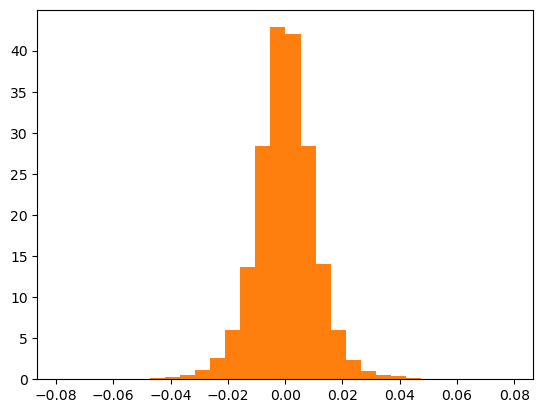

In [70]:
# Model output testing
# 1. R2 value
# 2. Q-Q plot
# 3. Residual analysis

from sklearn.metrics import r2_score

yhat = rf.predict(df.drop(columns=['price', 'cut', 'clarity', 'color']))
print(r2_score(yhat, df.price))

errors = yhat - df.price

plt.hist(errors, 30, density=True)
plt.show()


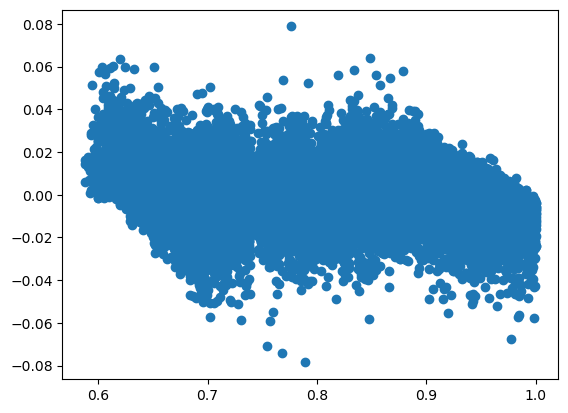

In [72]:
plt.scatter(y=errors, x=df.price)
plt.show()